# Introduction

The objectives of this lab are
- Introduction to the MNIST dataset,
- Manipulation of the Python library scikit-learn for machine learning,
- First examples of supervised classification with the k-nearest neighbors method (k-NN) [Lecture 1],
- Evaluation of the classification error,
- Selection of models.

Scikit-learn is a Python software requiring the installation of the libraries NumPy and SciPy (for scientific computation), in compatible versions.
- From scratch, the easiest is to install a complete Python distribution, e.g. Anaconda3 with a new environment, which includes most of the usual Python libraries. The official website of scikit-learn is: http://scikit-learn.org/stable/index.html.
- On the machines at INSA, the Python environment should already include most libraries. In the case of a missing library, you can add it with pip: e.g. **pip install numpy**. We advice to use an IDE, e.g. Visual Studio, to edit the jupyter-notebook.
- Alternatively, you can directly run your code on Google Colab, which allows to access your work from anywhere. Beware, the computation and memory resources are limited.

# 1. The dataset

### scikit-learn datasets
Some datasets are natively available in scikit-learn: https://scikit-learn.org/stable/datasets/real_world.html. It is also possible to generate artificial data or get external data (see unsupervised learning lab).

The datasets include a certain number of attributes (all attributes are not included in all datasets): in particular .data, .target, .target_names, .feature_names, .DESCR:
- .data: table of dimensions n x m where n is the number of samples, and m the number of features.
- .target: the classes (labels) of each instance (in the case of supervised learning).
- .target_names: names of the classes.
- .feature_names: names of the features.
- .DESCR: complete description of the dataset in textual format.

### MNIST
MNIST was developed by the pionners of deep learning, Y. LeCun et Y. Bengio, in 1998. The MNIST database, for Modified or Mixed National Institute of Standards and
Technology, is a database of manually written numbers from 0 to 9. By definition, it is a multi-class classification problem with 10 classes. An input sample is an image of fixed size 28 x 28. For example:

<img src="https://collonvillethomas.files.wordpress.com/2021/04/image-6.png?w=569" alt="MNIST example" />

Thus an example is a vector with 28*28=784 components corresponding to the grayscale of each of the 784 pixels.

## Exercice 1: Manipulation of the database

0. Importing the dataset

In [1]:
# Option 1:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# ## Option 2:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

# ## Option 3:
# ## Directly fetch mnist.mat on the internet, for example: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat

1. Execute the following commands and understand what they do (you will have to use them again).

In [2]:
# Visualize content of mnist dataset
print(mnist)
print (mnist.data)
print (mnist.target)
len(mnist.data)
help(len)
print (mnist.data.shape)
print (mnist.target.shape)

# Convert to numpy array
X=np.asarray(mnist.data)
print(len(X))
print(X[0])
print(X[0][1])
print(X[:,1])
print(X[:100])
y=np.asarray(mnist.target)
print(y[0])


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

- print(mnist) : print the entire dataset  
- mnist.data : array that contains 70000 row which correspond to each sample composed by 784 values. One value is for 1 pixel of the image.
- mnist.target : give the class of each sample
- len(minst.data) : give the number of sample in the dataset 
- mnist.data.shape : give the lenght of the minst.data matrix: number of sample, features, per sample (Here features are every pixels)  
- mnist.target.shape : give the lenght of the minst.target matrix  



   
- X is a vector of vectors, each element of the vector correspond to an image (vector of pixels)
- X[0] corresponds to the first image
- X[0][1] corresponds to the second piwxel of the first image  
- X[:,1] corresponds to second pixel of every image
- X[:100] corresponds to the 100 first images




   
- y is a targets vector
- y[0] corresponds to the first sample class








2. Visualise the data

scikit-learn includes the library matplotlib which propose numerous primitives to generate curves and graphics. The database MNIST contains written numbers as images with a fixed size 28 x 28. Execute the following commands and understand them.

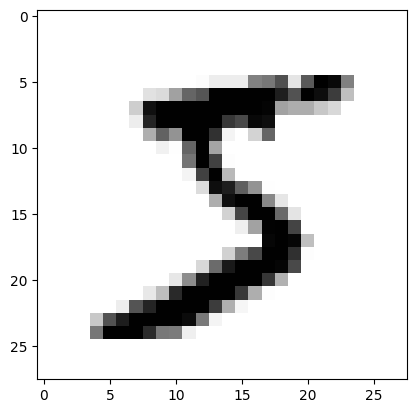

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
images = X.reshape((-1, 28, 28))
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

Affichez la classe correspondante à l’image affichée.

In [7]:
# TODO
print(y[0])

5


3. Explore other datasets

scikit-learn includes the library matplotlib which propose numerous primitives to generate curves and graphics. The database MNIST contains written numbers as images with a fixed size 28 x 28. Execute the following commands and understand them.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Moi\scikit_learn_data


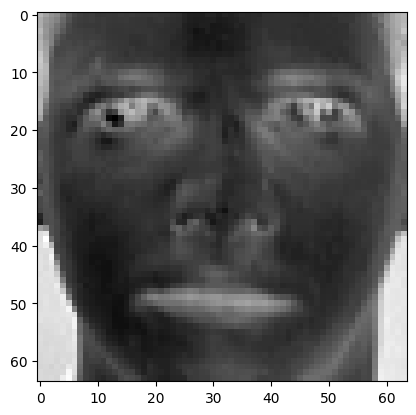

0


In [8]:
# SOLUTION
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

X_olivetti=np.asarray(olivetti.data)
images_olivetti = X_olivetti.reshape((-1, 64, 64))
plt.imshow(images_olivetti[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(olivetti.target[0])

# 2. The k-Nearest Neighbors (k-NN) method

The k-NN method is a very intuitive algorithm, which can be parametrized and often has a good performance on clasification problems.

The k-NN method requires:
- an integer k
- a training dataset
- a proximity/similarity/distance measure

The principle of the algorithm is the following:
For a new unlabelled example x, find the k labelled samples from the training dataset which are the closest with respect to the chosen measure (the neighbors). The class associated to x is then the one appearing most often among the neighbors (majority/consensus).

In the following example, we have 3 classes (ω1, ω2, ω3) and the goal is to find the value of the class for an unknown example x. We consider the Euclidian distance as proximity measure and k=5 neighbors.

<img src="https://miro.medium.com/v2/resize:fit:488/1*9h-WczF6csbeut5vsvjSUA.gif" alt="k-NN example" />

Among the 5 nearest neighbors, 4 belong to ω1 and 1 belongs to ω3, so x is affected to ω1, the class of the majority.

### Information:
We use the library sklearn.neighbors to execute an example of this classification algorithm.

The command **train_test_split**, implemented in **model_selection** in **sklearn** allows to divide the dataset in two: one training set and one test set:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=pourcentage_de_données)

Exemple percentage of data = 0.7 (70%)

The algorithm k-NN is implemented in a package called **neighbors**.
Here are the main commands:
- The line **clf = neighbors.KNeighborsClassifier(n_neighbors)** creates an object of type classifier based on the n_neighbors closest neighbors,
- The instruction clf.fit(X, y) uses the data to define the classifier (training),
- The command **clf.predict()** is used to classify the new examples,
- The command **clf.predict_proba()** allows to estimate the probability of the proposed classification,
- The command **clf.score(xtest, ytest)** computes the global score of the classifier for a given dataset.

## Exercice 2: The method of the k-NN

- Import the dataset

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X_complete=np.asarray(mnist.data)
y_complete=np.asarray(mnist.target)

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


- Extract a data sample named X with a size of 5000 examples using the function **np.random.randint(70000, size=5000)**, with the corresponding labels y.

In [2]:
# TODO
sample = np.random.randint(70000, size=5000)
X = X_complete[sample]
y = y_complete[sample]

We have generated a 5000 random sample vector in order to reduce the computational time of our program.  
It's enought to train our model and analyse its performances  
We have decided to choose randomized images to have the highest diversity in our dataset

- Divide the database in 80% for training and 20% for test.

In [6]:
# TODO
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, test_size = 0.2)

- Train a k-NN classifier with k = 10 on the training set.

In [13]:
# TODO
from sklearn import neighbors
k=4
clf = neighbors.KNeighborsClassifier(k)
clf.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

- Display image 4, the class of image 4 and its predicted class

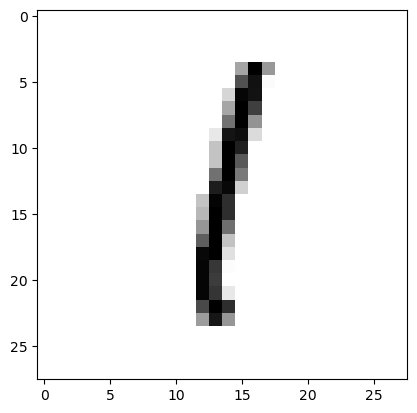

class of xtest[4] : 1
predicted class of xtest[4] : 1


In [14]:
# TODO
predicted = clf.predict(xtest)

from sklearn import datasets
import matplotlib.pyplot as plt
images = xtest.reshape((-1, 28, 28))
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

print("class of xtest[4] :", ytest[4])
print("predicted class of xtest[4] :", predicted[4])

We can see that the image seems to be a nine. The class of this image is 9 and the predicted class of this imaga is also 9. Therefore, we can see that the model is able to predict the classe of the image.

- Display the score on the test set

In [15]:
# TODO
print(clf.score(xtest,ytest))

0.93


We can see that the score is pretty high, close to 1, that means that our model is well trained and that can fit new and unknowned incomming data

- What is the error rate for the training set ? Is it normal ? Underfitting/Overfitting ?

In [16]:
# TODO
print((1-clf.score(xtrain,ytrain)))


0.040000000000000036


We can see that the error rate is very low, close to 0. That means that the model is well trained on our training-dataset.
If the error rate is low, the model can be to specific to the training-set and may not fit the tessting-dataset.

- Vary the percentage of samples (training and test) and display the score. What is the remarkable percentage ?

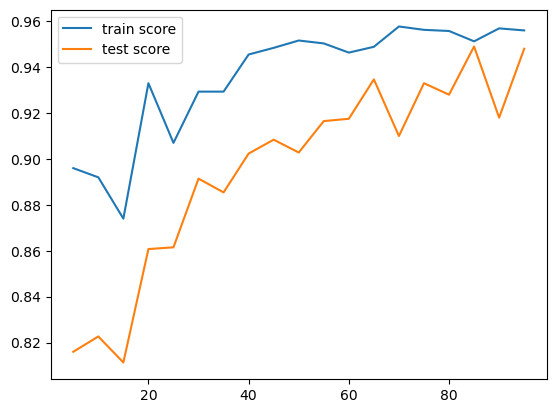

In [17]:
# TODO
from sklearn.model_selection import train_test_split
from sklearn import neighbors


k=4

train_score=[]
test_score=[]
percent_vec=[]

for percent in range(5,100,5):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=round(percent/100,1))
    
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)

    train_score.append(clf.score(xtrain,ytrain))
    test_score.append(clf.score(xtest,ytest))
    percent_vec.append(percent)

    
plt.plot(percent_vec, train_score)
plt.plot(percent_vec, test_score)
plt.legend(["train score", "test score"])
plt.show()
    



we varied the percentage of the training set from 5 to 95 and we can see that the score over the trainin set in orange is starting to decline when the percentage is above 80. Therefore the highest score is reachable with a percentage of 80 for the training set

- Vary the number of neighbors (k) from 2 to 15 and display the scores as a curve (one curve for training and one for test). What is the optimal k ? Implement two approaches:
    - use a loop on k using the training and test datasets,
    - use a K-fold validation as implemented with the functions **kf = KFold(len(X), n_folds=10, shuffle=True, random_state=42)** and **kf.split(X)** from sklearn.model_selection. Let's remind that the score for a particular model (one choice of k) is obtained as the average score over all folds.

2 0.030749999999999944
3 0.038250000000000006
4 0.04799999999999993
5 0.026999999999999913
6 0.025499999999999967
7 0.023749999999999938
8 -0.0012499999999999734
9 0.009499999999999953
10 0.019749999999999934
11 0.018749999999999933
12 0.019000000000000017
13 0.030749999999999944
14 0.025499999999999967
15 0.02300000000000002


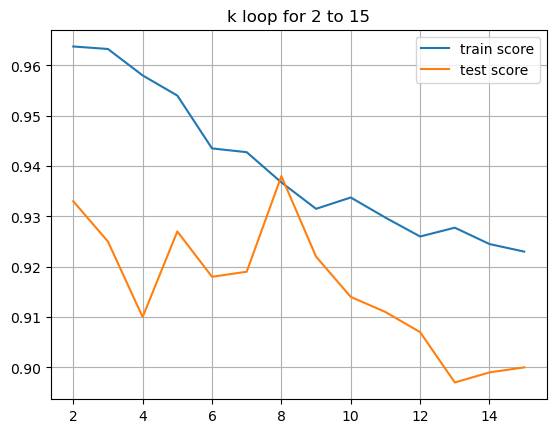

2 0.04473333333333329
3 0.03433333333333355
4 0.025977777777777766
5 0.024466666666666526
6 0.02104444444444442
7 0.022466666666666635
8 0.018711111111111123
9 0.01671111111111101
10 0.015155555555555367
11 0.014000000000000012
12 0.011866666666666581
13 0.013555555555555543
14 0.011755555555555297
15 0.011577777777777798


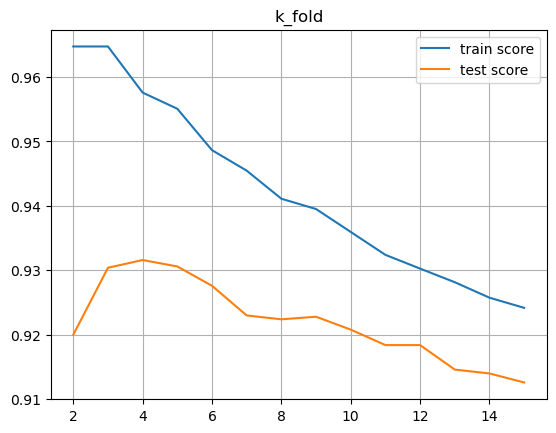

In [18]:
# TODO
## Use a loop
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import KFold
train_score=[]
test_score=[]
k_vec=[]

for k in range(2,16):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
    
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)

    train_score.append(clf.score(xtrain,ytrain))
    test_score.append(clf.score(xtest,ytest))
    k_vec.append(k)
    print(k, clf.score(xtrain,ytrain)-clf.score(xtest,ytest))

    
plt.plot(k_vec, train_score)
plt.plot(k_vec, test_score)
plt.legend(["train score", "test score"])
plt.title("k loop for 2 to 15")
plt.grid(True)
plt.show()

## Use a K-fold validation
train_score=[]
test_score=[]
k_vec=[]

for k in range(2,16):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    average_train = 0
    average_test = 0
    n = 0
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        xtrain = X[train_index]
        ytrain = y[train_index]
        xtest = X[test_index]
        ytest = y[test_index]
        
        clf = neighbors.KNeighborsClassifier(k)
        clf.fit(xtrain, ytrain)

        average_train += clf.score(xtrain,ytrain)
        average_test += clf.score(xtest,ytest)
        n+=1

        
    average_train = average_train/n
    average_test = average_test/n
    train_score.append(average_train)
    test_score.append(average_test)
    k_vec.append(k)
    print(k, average_train-average_test)
    
    

    
plt.plot(k_vec, train_score)
plt.plot(k_vec, test_score)
plt.legend(["train score", "test score"])
plt.title("k_fold")
plt.grid(True)
plt.show()

# Display scores

The first plot displays the score for the training and test set for a range of k. We can see a maximum test score at k=8. However, this k is not reliable because it depend on the small set we randomly choose. In order to have a better estimation of the best k we need to add the k_fold option. k_fold is a technique for evaluating predictive models. The dataset is divided into k fold. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model's generalization performance. In other world, this technique allows us to have an average score for each k, then it's more robust according to the dataset choosen. In the second plot we can see that k=4 has the highest test score compare to k=8

- Still using K-fold, vary the type of distance used. What is the best distance in our case ?

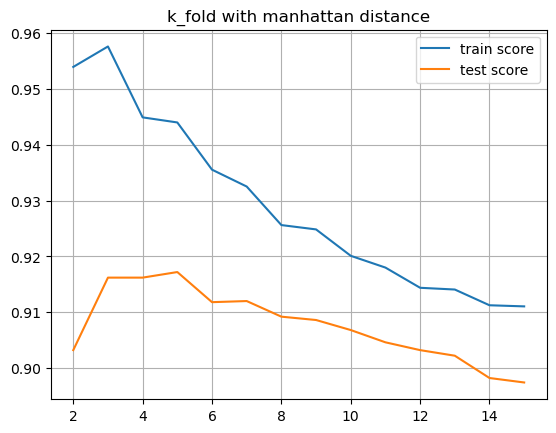

In [19]:
# TODO
train_score=[]
test_score=[]
k_vec=[]
for k in range(2,16):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    average_train = 0
    average_test = 0
    n = 0
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        xtrain = X[train_index]
        ytrain = y[train_index]
        xtest = X[test_index]
        ytest = y[test_index]
        
        clf = neighbors.KNeighborsClassifier(k, p=1)
        clf.fit(xtrain, ytrain)

        average_train += clf.score(xtrain,ytrain)
        average_test += clf.score(xtest,ytest)
        n+=1

        
    average_train = average_train/n
    average_test = average_test/n
    train_score.append(average_train)
    test_score.append(average_test)
    k_vec.append(k)
    
    

    
plt.plot(k_vec, train_score)
plt.plot(k_vec, test_score)
plt.legend(["train score", "test score"])
plt.title("k_fold with manhattan distance")
plt.grid(True)
plt.show()

In this section we are studying the distance as a performance criteria of our model prediction. The distance used in the section above is the euclidian distance and the distance used in this one is the manhattan distance. We can see that the manhattan distance provides a worse score thant the euclidian distance. We have also shown that the distance has an impart on the performance of our model and its choice depends on the type of data we are processing

- Fixez n_job à 1 puis à -1 et calculez le temps de chacun.

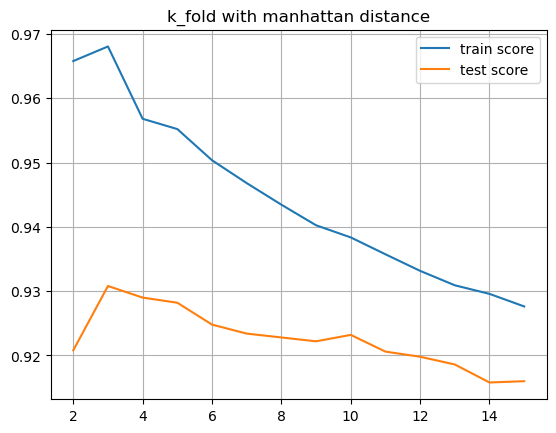

execution time with n_fold=1 : 48.98612880706787


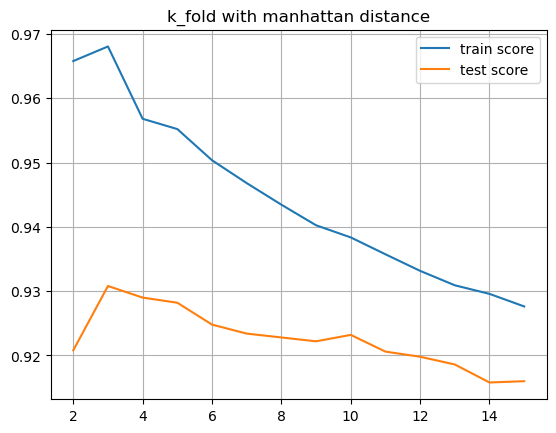

execution time with n_fold=-1 : 50.66032528877258


In [5]:
#TODO
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import KFold
train_score=[]
test_score=[]
k_vec=[]
t1 = time.time()
for k in range(2,16):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    average_train = 0
    average_test = 0
    n = 0
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        xtrain = X[train_index]
        ytrain = y[train_index]
        xtest = X[test_index]
        ytest = y[test_index]
        
        clf = neighbors.KNeighborsClassifier(k, n_jobs = 1)
        clf.fit(xtrain, ytrain)

        average_train += clf.score(xtrain,ytrain)
        average_test += clf.score(xtest,ytest)
        n+=1

        
    average_train = average_train/n
    average_test = average_test/n
    train_score.append(average_train)
    test_score.append(average_test)
    k_vec.append(k)
    
t2 = time.time()  

    
plt.plot(k_vec, train_score)
plt.plot(k_vec, test_score)
plt.legend(["train score", "test score"])
plt.title("k_fold with manhattan distance")
plt.grid(True)
plt.show()
print("execution time with n_fold=1 :", t2-t1)



#TODO
import time
train_score=[]
test_score=[]
k_vec=[]
t1 = time.time()
for k in range(2,16):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    average_train = 0
    average_test = 0
    n = 0
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        xtrain = X[train_index]
        ytrain = y[train_index]
        xtest = X[test_index]
        ytest = y[test_index]
        
        clf = neighbors.KNeighborsClassifier(k, n_jobs = -1)
        clf.fit(xtrain, ytrain)

        average_train += clf.score(xtrain,ytrain)
        average_test += clf.score(xtest,ytest)
        n+=1

        
    average_train = average_train/n
    average_test = average_test/n
    train_score.append(average_train)
    test_score.append(average_test)
    k_vec.append(k)
    
t2 = time.time()  

    
plt.plot(k_vec, train_score)
plt.plot(k_vec, test_score)
plt.legend(["train score", "test score"])
plt.title("k_fold with manhattan distance")
plt.grid(True)
plt.show()
print("execution time with n_fold=-1 :", t2-t1)

For the KNeighborsClassifier, the n_jobs parameter controls the number of parallel jobs for the computation of k-neighbors. The k-neighbors computation involves finding the k nearest neighbors for each data point, and it can be a computationally intensive task, especially for large datasets.
- When n_jobs = 1 (default), the computation is done in a single process without parallelization.
- When n_jobs = -1, the algorithm will use all available CPU cores for parallel computation.

In our case, we can see that the time is bigger when using the parallel computation. Parallel computation can be very efficient on a very large dataset and on spefcific models. Here, we can see that it is not necessary but if the dataset would have been larger, we could have considered this option


- In your opinion, what are the advantages and disadvantages of the k-NN method: optimality ? computation time ? scalability ?

k-NN is a simple and intuitive algorithm with its strengths in certain scenarios, particularly when the dataset is small or when decision boundaries are intricate. However, it may not be the best choice for large datasets, and its performance can be sensitive to the choice of hyperparameters and the nature of the data. It's often worthwhile to consider other algorithms, especially for high-dimensional or large-scale problems of classification.

# 3. The Support Vector Machines (SVM) method

The SVM is a method finding a linear separation between 2 classes of samples in an augmented space using kernel functions, while optimizing the margin between the 2 classes. This method can have a good performance on clasification problems.

The SVM method requires:
- a kernel (e.g. Gaussian)
- a training dataset

The SVM method is designed for binary classification and it is possible to perform multi-class classification by using several "one-vs-rest" binary classification. The Support Vector Classification method automatically perform this multi-class approach.

In the following example, we have 3 classes (ω1, ω2, ω3) and the goal is to find the value of the class for an unknown example x. We consider several Kernels

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" alt="SVM" />

The results are highly dependent on the choice of this kernel.

### Information:
The algorithm SVC is implemented in a package called **sklearn.svm**: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.

In order for the SVM method to perform well, the data needs to be centered. This can be performed using the **StandardScaler** function in the package sklearn.preprocessing. The main commands are then:
- scaler = StandardScaler()
- X_train = scaler.fit_transform(X_train)
- X_test = scaler.transform(X_test)

Then to get the SVC classifier, here are the main commands:
- The line **clf = SVC(kernel='rbf', decision_function_shape='ovr')** creates an object of type classifier based on the Gaussian kernel,
- The instruction clf.fit(X, y) uses the data to define the classifier (training),
- The command **clf.predict()** is used to classify the new examples,
- The command **clf.score(xtest, ytest)** computes the global score of the classifier for a given dataset.

## Exercice 3: The SVC method

- Just like before: import the data and extract a data sample named X with a size of 5000 examples.

In [6]:
# TODO
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


mnist = fetch_openml('mnist_784')

X_complete=np.asarray(mnist.data)
y_complete=np.asarray(mnist.target)

sample = np.random.randint(70000, size=5000)
X = X_complete[sample]
y = y_complete[sample]





/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


- Inspired by the previous work on the k-NN: use K-fold validation in order to decide which kernel gives the best results for our classification problem using an SVC classifier. Do not forget to scale the data.

In [7]:
# TODO
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()

for kernel in ['linear', 'poly', 'rbf', 'sigmoid'] :

    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    average_train = 0
    average_test = 0
    n = 0
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        xtrain = scaler.fit_transform(X[train_index])
        ytrain = y[train_index]
        xtest = scaler.transform(X[test_index])
        ytest = y[test_index]



        clf = SVC(kernel=kernel, decision_function_shape='ovr')
        clf.fit(xtrain, ytrain)

        average_train += clf.score(xtrain,ytrain)
        average_test += clf.score(xtest,ytest)
        n+=1


    average_train = average_train/n
    average_test = average_test/n

    
    print("kernel :", kernel, ", train score :", average_train, ", test score :", average_test)


kernel : linear , train score : 1.0 , test score : 0.9164000000000001
kernel : poly , train score : 0.9071555555555557 , test score : 0.8368
kernel : rbf , train score : 0.9825555555555556 , test score : 0.9238000000000002
kernel : sigmoid , train score : 0.9180222222222223 , test score : 0.9074000000000002


We have tried several kernel to find the best one for our classification problem. We have use the Kfold function in order to smooth the results. This allows us to have a more reliable estimate of our classifier on our dataset.
We can see that the linear kernel is the one that gives us the best results

- In your opinion, what are the advantages and disadvantages of the SVM method: optimality ? computation time ? scalability ?

SVMs are powerful and versatile models that perform well in various scenarios, particularly when dealing with high-dimensional data and well-defined class boundaries. However, their computational complexity can be a limiting factor for large datasets, and the choice of kernel and parameters requires careful consideration. SVMs are generally well-suited for medium-sized datasets.